<a href="https://colab.research.google.com/github/cu-applied-math/stem-camp-notebooks/blob/master/notebooks/20Q/playGame/20Qsports_StephensSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stephen's implementation of the decision tree 20Q game

## Read in the data, as in the setup script

In [2]:
# Download the data
!wget -q https://github.com/cu-applied-math/stem-camp-notebooks/raw/student-colab/notebooks/20Q/data/SportsDataset_ListOfSports.csv
!wget -q https://github.com/cu-applied-math/stem-camp-notebooks/raw/student-colab/notebooks/20Q/data/SportsDataset_ListOfAttributes.csv
!wget -q https://github.com/cu-applied-math/stem-camp-notebooks/raw/student-colab/notebooks/20Q/data/SportsDataset_DataAttributes.csv

import csv
sports = []  # This is a python "list" data structure (it is "mutable")
# The file has a list of sports, one per line.
# There are spaces in some names, but no commas or weird punctuation
with open('SportsDataset_ListOfSports.csv','r') as csvfile:
    myreader = csv.reader(csvfile)
    for index, row in enumerate( myreader ):
        sports.append(' '.join(row) ) # the join() call merges all fields
# Make a look-up table: if you input the name of the sport, it tells you the index
# Also, print out a list of all the sports, to make sure it looks OK
Sport2Index = {}
for ind, sprt in enumerate( sports ):
    Sport2Index[sprt] = ind
    print('Sport #', ind,'is',sprt)
# And example usage of the index lookup:
#print('The sport "', sports[7],'" has 0-based index', Sport2Index[sports[7]])

# -- And read in the list of questions --
# this csv file has only a single row
questions = []
with open('SportsDataset_ListOfAttributes.csv','r') as csvfile:
    myreader = csv.reader( csvfile )
    for row in myreader:
        questions = row
Question2Index = {}
for ind, quest in enumerate( questions ):
    Question2Index[quest] = ind
    #print('Question #', ind,': ',quest)
# And example usage of the index lookup:
#print('The question "', questions[10],'" has 0-based index', Question2Index[questions[10]])

# -- And read in the training data --
YesNoDict = { "Yes": 1, "No": -1, "Unsure": 0, "": 0 }
# Load from the csv file.
# Note: the file only has "1"s, because blanks mean "No"

X = []
with open('SportsDataset_DataAttributes.csv','r') as csvfile:
    myreader = csv.reader(csvfile)
    for row in myreader:
        data = [];
        for col in row:
            data.append( col or "-1")
        X.append( list(map(int,data)) ) # integers, not strings

# This data file is listed in the same order as the sports
# The variable "y" contains the index of the sport
Y = range(len(sports)) # this doesn't work
Y = list( map(int,Y) ) # Instead, we need to ask python to really enumerate it!

Sport # 0 is Diving
Sport # 1 is Swimming
Sport # 2 is Synchronized Swimming
Sport # 3 is Water Polo
Sport # 4 is Kayak
Sport # 5 is Basketball
Sport # 6 is Bicycling
Sport # 7 is Speed skating
Sport # 8 is Figure skating
Sport # 9 is Gymnastics
Sport # 10 is Volleyball
Sport # 11 is Wrestling
Sport # 12 is Track/running
Sport # 13 is Baseball
Sport # 14 is Boxing
Sport # 15 is Fencing
Sport # 16 is Field Hockey
Sport # 17 is Football
Sport # 18 is Golf
Sport # 19 is Sailing
Sport # 20 is Softball
Sport # 21 is Ping pong
Sport # 22 is Tennis
Sport # 23 is Ice hockey
Sport # 24 is Skiing


# Answers to student notebook

In [ ]:
# Solution to Task #4
from sklearn import tree
#clf = tree.DecisionTreeClassifier(max_depth=13,min_samples_leaf=1)
clf = tree.DecisionTreeClassifier()
clf.fit(X,Y)
clf.score(X,Y)

In [14]:
# Solution to task #5
ind = Sport2Index['Basketball']
print(ind)
bball = X[ind]
print('For sport=basketball, the yes/no answers were:')
print(list(map(lambda x: 'yes' if x==1 else 'no' , bball )))
print('From these answers, the decision tree predicts:')
ans = clf.predict( [bball] )[0]
sports[ans]

5
For sport=basketball, the yes/no answers were:
['no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no']
From these answers, the decision tree predicts:


'Basketball'

In [ ]:
# Solution to task #6
x = [0]*len(questions)
for i,Q in enumerate( questions ):
    print(Q)
    x[i] = int( input("  [1 for Yes, -1 for No]  ") )
    #x[i] = parseInput(input("  [Yes/no/unsure]  "))


Water Sport?
  [1 for Yes, -1 for No]  1
Necessarily a team sport?
  [1 for Yes, -1 for No]  1
Ice involved?
  [1 for Yes, -1 for No]  1
Snow involved? 
  [1 for Yes, -1 for No]  -1
One-on-one matches?
  [1 for Yes, -1 for No]  1
Subjective scoring?
  [1 for Yes, -1 for No]  1
Race of some sort?
  [1 for Yes, -1 for No]  1
Is it always played outdoors?
  [1 for Yes, -1 for No]  1
Is it a combat sport?
  [1 for Yes, -1 for No]  1
Is there a goal or a hoop?
  [1 for Yes, -1 for No]  1
Does each person have large equipment (bike, boat; NOT skates, skis, stick...)
  [1 for Yes, -1 for No]  1
Does each participant have small gear like a racquet, stick, skates, skis, mitt, sword, etc.?
  [1 for Yes, -1 for No]  1
Is there a ball bigger than a baseball used?
  [1 for Yes, -1 for No]  1
Is there a weapon involved?
  [1 for Yes, -1 for No]  1


# Actually classify (here, we depart from public script)

In [15]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
#clf = tree.DecisionTreeClassifier(max_depth=8,min_samples_leaf=2)
clf = tree.DecisionTreeClassifier(max_depth=13,min_samples_leaf=1)
clf.fit(X,Y)
# Try changing the training data, so that we don't get 100% accuracy:
#X2 = X.copy()
#X2[15][-1] = -1
#clf.fit(X2,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=13, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

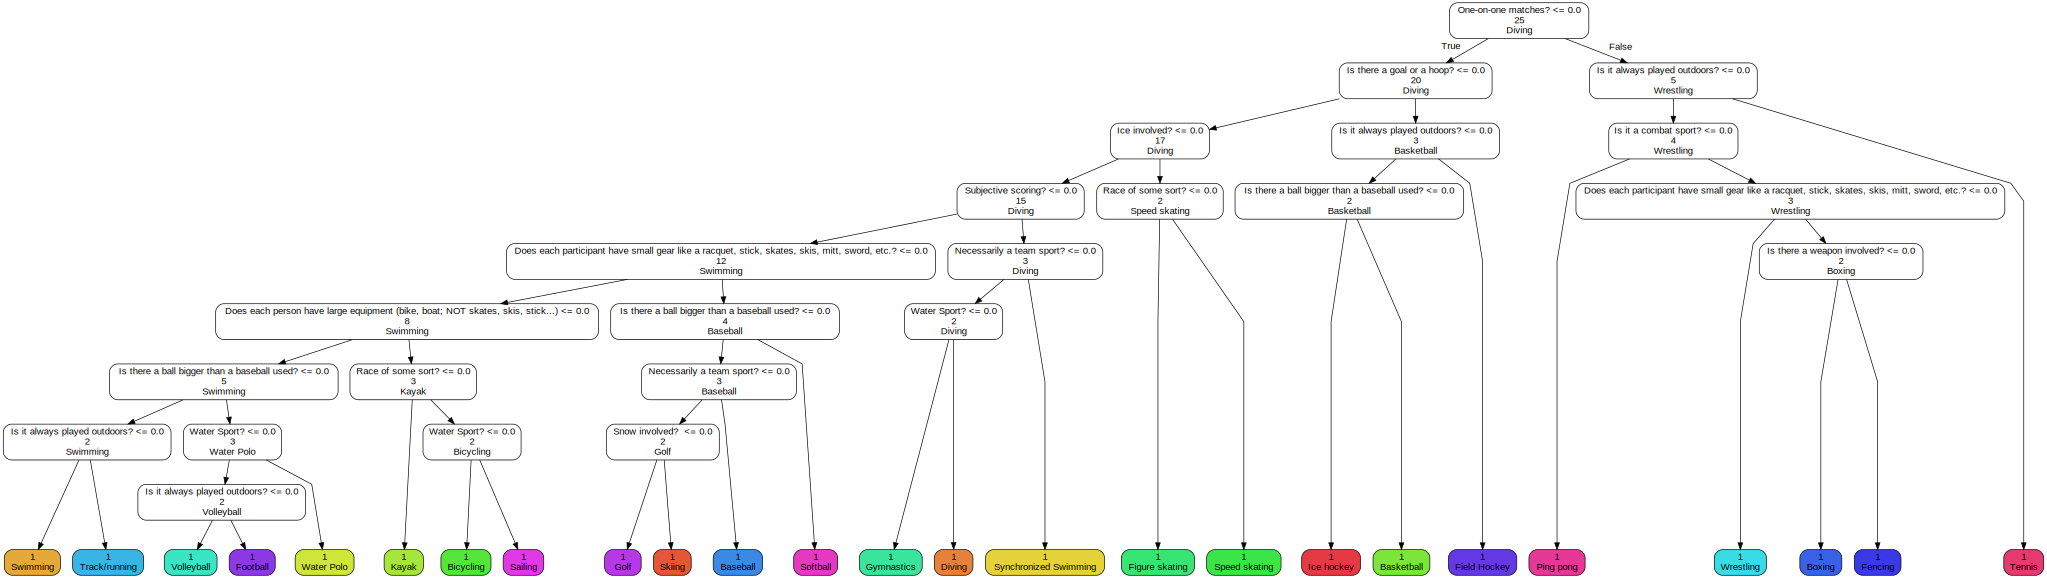

In [33]:
# -- Visualize the decision tree --

import graphviz

# dot_data = tree.export_graphviz( clf, out_file='sportsTree.dot', feature_names = questions,impurity=False,
#                                class_names = sports,filled=True, rounded=True,label=None,
#                                proportion=True) # impurity = False
# # export to out_file = 'sportsTree.dot', then in vim, use `%s/\\n\[.*\]\\n/\\n/g` to remove labels
# graph = graphviz.Source( dot_data )
# graph.render('sportsTree')
# graph

# Try another way (July 2020), following Coursera course
# see plot_decision_tree() in 
# https://github.com/Starignus/AppliedML_Python_Coursera/blob/d70b1433eb18bd22fd193faa86b291eae699f4fc/adspy_shared_utilities.py
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="sportsTree.dot", feature_names=questions, class_names=sports,
                filled = True, rounded=True,
                impurity = False,label='none',leaves_parallel=True)
! sed -i 's/\\n\[.*\]\\n/\\n/g' sportsTree.dot
# Oh well. It's OK to include values
with open("sportsTree.dot") as f:
  dot_graph = f.read()
graphviz.Source( dot_graph )

# If you can't gt graphviz to work, then use this old static image:
# from IPython.display import Image
# Image(url='https://github.com/cu-applied-math/stem-camp-notebooks/raw/master/notebooks/20Q/playGame/sportsTree.png')

In [ ]:
# let's see how well we do
# You can also use clf.score(X,y) 
def correctPercentage( predictions, actual ):
    correct = 0
    for i,guess in enumerate(predictions):
        if guess == actual[i]:
            correct = correct + 1
    return correct/len(predictions)

In [ ]:
clf2 = RandomForestClassifier(max_depth=10,n_estimators=10)
clf2 = clf2.fit(X,Y)
print(correctPercentage( clf.predict(X), Y ))
print(correctPercentage( clf2.predict(X), Y ))
clf.score(X,y)

In [ ]:
# cross validate (hard to do, due to small amount of data)
clf3 = tree.DecisionTreeClassifier(random_state=0,max_depth=8)
from sklearn.model_selection import cross_val_score
cross_val_score(clf3, X, Y)#, cv=2)
len(X)

## Now, start the real hacking, so that it let's us interact
some info here: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
and also movie list here: https://docs.google.com/spreadsheets/d/1-849aPzi8Su_c5HwwDFERrogXjvSaZFfp_y9MHeO1IA/edit?usp=sharing

In [ ]:
tree_ = clf.tree_
from sklearn.tree import _tree
import numpy as np
#dir(_tree.Tree) # inspect what we have to work with
#dir(_tree)

In [ ]:
def parseInput(str):
    # first, ignore capitalization
    str=str.lower()
    if str[0] == 'y':
        return 1
    elif str[0] == 'n':
        return -1
    else:
        return 0
    
def askQuestion(node=0):
    Q         = tree_.feature[node]
    threshold = tree_.threshold[node]
    if Q == _tree.TREE_UNDEFINED or Q == _tree.TREE_LEAF:
        # at a leaf node, so make the prediction
        vals = tree_.value[node][0]  # size of all movies
        ind  = np.argmax( vals )
        print('GUESS: ', sports[ind] )
    else:
        # ask a question and recurse
        print(questions[Q])
        ans = parseInput(input("  [Yes/no/unsure]  "))
        if ans <= threshold:
            askQuestion(tree_.children_left[node])
        else:
            askQuestion(tree_.children_right[node])

# or maybe ask for all 13 questions
def fullSport():
    x = [0]*len(questions)
    for i,Q in enumerate( questions ):
        print(Q)
        x[i] = parseInput(input("  [Yes/no/unsure]  "))
    return x

In [ ]:
# Play game!
askQuestion()

Water Sport?
  [Yes/no/unsure]  n
Is it always played outdoors?
  [Yes/no/unsure]  n
Is there a ball bigger than a baseball used?
  [Yes/no/unsure]  n
Is there a goal or a hoop?
  [Yes/no/unsure]  n
One-on-one matches?
  [Yes/no/unsure]  y
Does each participant have small gear like a racquet, stick, skates, skis, mitt, sword, etc.?
  [Yes/no/unsure]  y
Is it a combat sport?
  [Yes/no/unsure]  y
GUESS:  Boxing


In [ ]:
# Or get all 13 unique questions on one movie, and try random forests
x = fullSport()
print('PREDICTION (random forests): ', sports[ clf2.predict([x])[0] ] )
print('PREDICTION (decision tree ): ', sports[ clf.predict([x])[0] ] )

Water Sport?
  [Yes/no/unsure]  y
Necessarily a team sport?
  [Yes/no/unsure]  y
Ice involved?
  [Yes/no/unsure]  n
Snow involved? 
  [Yes/no/unsure]  n
One-on-one matches?
  [Yes/no/unsure]  n
Subjective scoring?
  [Yes/no/unsure]  y
Race of some sort?
  [Yes/no/unsure]  n
Is it always played outdoors?
  [Yes/no/unsure]  n
Is it a combat sport?
  [Yes/no/unsure]  n
Is there a goal or a hoop?
  [Yes/no/unsure]  n
Does each person have large equipment (bike, boat; NOT skates, skis, stick...)
  [Yes/no/unsure]  n
Does each participant have small gear like a racquet, stick, skates, skis, mitt, sword, etc.?
  [Yes/no/unsure]  n
Is there a ball bigger than a baseball used?
  [Yes/no/unsure]  n
Is there a weapon involved?
  [Yes/no/unsure]  n
PREDICTION (random forests):  Synchronized Swimming
PREDICTION (decision tree ):  Synchronized Swimming
